In [ ]:
!pip install tensorflow

In [ ]:
!pip install sentence-transformers

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from numpy import array
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

from sentence_transformers import SentenceTransformer

nltk.download('stopwords')
nltk.download('punkt')

data_set = pd.read_csv('/content/data.csv') # file taken from google colab directory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = sentence.lower()
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    tokens = word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text
data = []
label = []
sentences = list(data_set.iloc[:,1])
for sen in sentences:
  data.append(preprocess_text(sen))

for i in data_set.iloc[:,2]:
  label.append(i)


In [ ]:
# Tfidf vectorizing method
my_stopwords = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words = my_stopwords)
tfidf_matrix = vectorizer.fit_transform(data)


In [ ]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, label,test_size=0.20, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = MultinomialNB()


lr.fit(x_train_tfidf,y_train_tfidf)
dt.fit(x_train_tfidf,y_train_tfidf)
rf.fit(x_train_tfidf,y_train_tfidf)
clf.fit(x_train_tfidf,y_train_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultinomialNB()

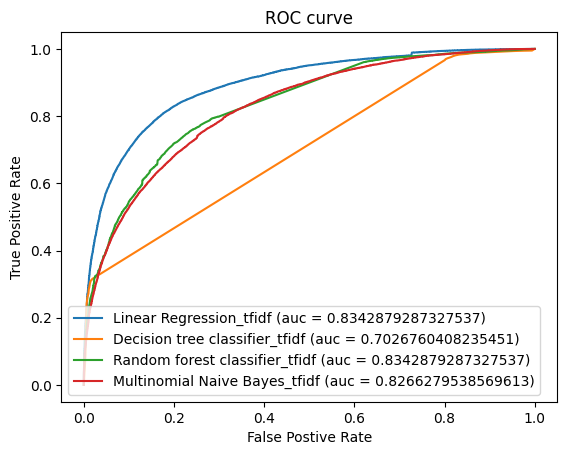

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_tfidf)

from sklearn.metrics import auc
y_pred_lr = lr.predict_proba(x_test_tfidf)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_lr) # fpr - false postive rate, tpr - true postive rate
auc_lr = auc(fpr_lr, tpr_lr)

y_pred_dt = dt.predict_proba(x_test_tfidf)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(x_test_tfidf)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_clf = clf.predict_proba(x_test_tfidf)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test_encoded, y_pred_clf)
auc_clf = auc(fpr_clf, tpr_clf)

plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression_tfidf (auc = {auc_lr})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier_tfidf (auc = {auc_dt})')
plt.plot(fpr_rf, tpr_rf, label=f'Random forest classifier_tfidf (auc = {auc_rf})')
plt.plot(fpr_clf, tpr_clf, label=f'Multinomial Naive Bayes_tfidf (auc = {auc_clf})')

plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(data)
LSA = TruncatedSVD(n_components = 100)


LSA_matrix = LSA.fit_transform(data_vectorized)
# LSA_matrix = np.clip(LSA_matrix, 0, None)

In [ ]:
x_train_lsa, x_test_lsa, y_train_lsa, y_test_lsa = train_test_split(LSA_matrix, label,test_size=0.20, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB



lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = MultinomialNB()

lr.fit(x_train_lsa,y_train_lsa)
dt.fit(x_train_lsa,y_train_lsa)
rf.fit(x_train_lsa,y_train_lsa)
LSA_matrix_1 = np.clip(LSA_matrix, 0, None) # clipping non-negative values since multinomial naive bayes won't take negative values
x_train_lsa_1, x_test_lsa_1, y_train_lsa_1, y_test_lsa_1 = train_test_split(LSA_matrix_1, label,test_size=0.20, random_state=42)

clf.fit(x_train_lsa_1,y_train_lsa_1)


MultinomialNB()

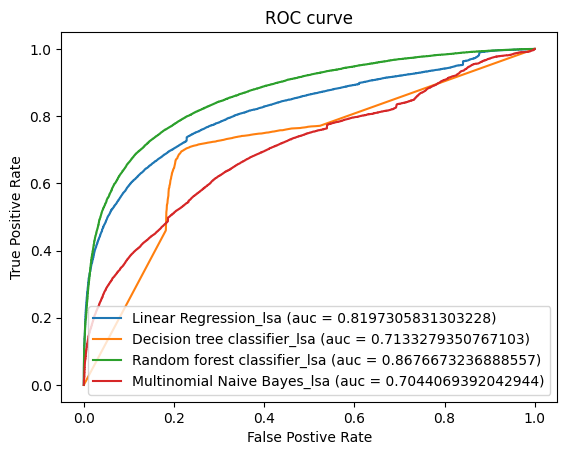

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_lsa)

from sklearn.metrics import auc
y_pred_lr = lr.predict_proba(x_test_lsa)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_lr) # fpr - false postive rate, tpr - true postive rate
auc_lr = auc(fpr_lr, tpr_lr)

y_pred_dt = dt.predict_proba(x_test_lsa)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(x_test_lsa)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_clf = clf.predict_proba(x_test_lsa_1)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test_encoded, y_pred_clf)
auc_clf = auc(fpr_clf, tpr_clf)

plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression_lsa (auc = {auc_lr})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier_lsa (auc = {auc_dt})')
plt.plot(fpr_rf, tpr_rf, label=f'Random forest classifier_lsa (auc = {auc_rf})')
plt.plot(fpr_clf, tpr_clf, label=f'Multinomial Naive Bayes_lsa (auc = {auc_clf})')

plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

In [ ]:
tokenized_texts = [word_tokenize(text.lower()) for text in data]
preprocessed_texts = [' '.join(tokens) for tokens in tokenized_texts]
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
vectorized_data = vectorizer.fit_transform(preprocessed_texts)
lda = LatentDirichletAllocation(n_components=10, random_state=42) # Applying LDA
lda_matrix = lda.fit_transform(vectorized_data)

print(lda_matrix)

[[0.36797659 0.01428572 0.01428571 ... 0.01428572 0.51773154 0.01428571]
 [0.0111112  0.01111167 0.01111288 ... 0.01111656 0.37248846 0.01111524]
 [0.01428572 0.01428614 0.01428606 ... 0.31241169 0.01428846 0.01428574]
 ...
 [0.05       0.55       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.55       0.05      ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]]


In [ ]:
print(lda_matrix.shape)

(235110, 10)


In [ ]:
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(lda_matrix, label,test_size=0.20, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = MultinomialNB()

lr.fit(x_train_lda,y_train_lda)
dt.fit(x_train_lda,y_train_lda)
rf.fit(x_train_lda,y_train_lda)
clf.fit(x_train_lda,y_train_lda)


MultinomialNB()

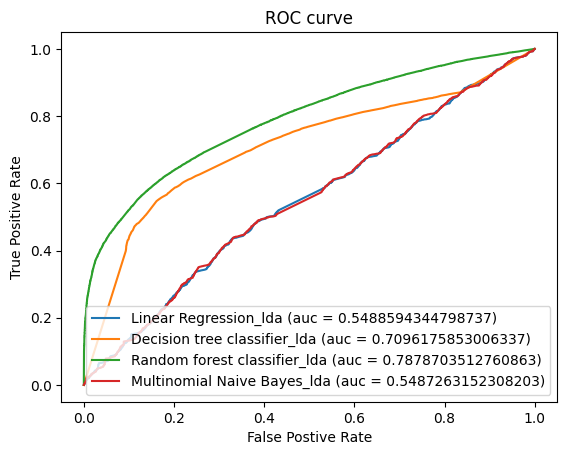

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_lda)
from sklearn.metrics import auc
y_pred_lr = lr.predict_proba(x_test_lda)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

y_pred_dt = dt.predict_proba(x_test_lda)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(x_test_lda)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_clf = clf.predict_proba(x_test_lda)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test_encoded, y_pred_clf)
auc_clf = auc(fpr_clf, tpr_clf)

plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression_lda (auc = {auc_lr})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier_lda (auc = {auc_dt})')
plt.plot(fpr_rf, tpr_rf, label=f'Random forest classifier_lda (auc = {auc_rf})')
plt.plot(fpr_clf, tpr_clf, label=f'Multinomial Naive Bayes_lda (auc = {auc_clf})')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

In [ ]:
# Word embedding
# Example data
# corpus = [
#     "This is a sentence",
#     "This is another sentence",
#     "Yet another sentence"
# ]

# Tokenize the data
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in data]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size= 100, window=5, sg=1, min_count=1)

# Function to vectorize a document using the trained Word2Vec model
def document_vectorizer(document, model):
    vectors = []
    for word in document:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Vectorize each document in the corpus
vectors = [document_vectorizer(document, model) for document in tokenized_corpus]

In [ ]:
x_train_word, x_test_word, y_train_word, y_test_word = train_test_split(vectors, label,test_size=0.20, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = MultinomialNB()

lr.fit(x_train_word,y_train_word)
dt.fit(x_train_word,y_train_word)
rf.fit(x_train_word,y_train_word)
vectors_1 = np.clip(vectors, 0, None) # clipping non-negative values since multinomial naive bayes won't take negative values
x_train_word_1, x_test_word_1, y_train_word_1, y_test_word_1 = train_test_split(vectors_1, label,test_size=0.20, random_state=42)

clf.fit(x_train_word_1,y_train_word_1)

MultinomialNB()

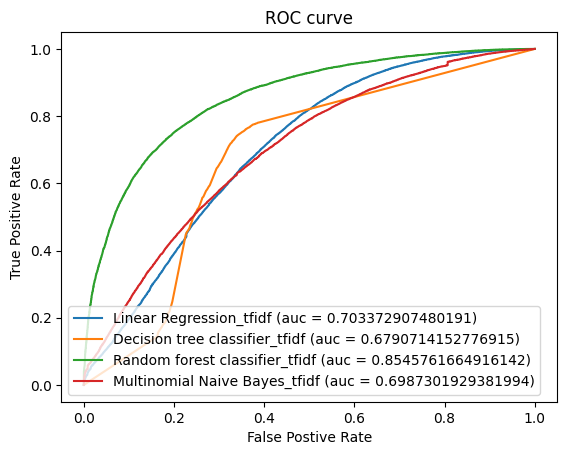

In [ ]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_word)

from sklearn.metrics import auc
y_pred_lr = lr.predict_proba(x_test_word)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_lr) # fpr - false postive rate, tpr - true postive rate
auc_lr = auc(fpr_lr, tpr_lr)

y_pred_dt = dt.predict_proba(x_test_word)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(x_test_word)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_clf = clf.predict_proba(x_test_word_1)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test_encoded, y_pred_clf)
auc_clf = auc(fpr_clf, tpr_clf)

plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression_word_embedding (auc = {auc_lr})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier_word_embedding (auc = {auc_dt})')
plt.plot(fpr_rf, tpr_rf, label=f'Random forest classifier_word_embedding (auc = {auc_rf})')
plt.plot(fpr_clf, tpr_clf, label=f'Multinomial Naive Bayes_word_embedding (auc = {auc_clf})')

plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

In [ ]:
# Example dataset with sentences
data_1 = pd.DataFrame({'sentence': data}, index = range(len(data)))

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Encode sentences to obtain sentence embeddings
sentence_embeddings = model.encode(data_1['sentence'].tolist())

# Print the sentence embeddings
# print("Sentence embeddings:")
# print(sentence_embeddings)


In [ ]:
x_train_sentence, x_test_sentence, y_train_sentence, y_test_sentence = train_test_split(sentence_embeddings, label,test_size=0.20, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = MultinomialNB()

lr.fit(x_train_sentence,y_train_sentence)
dt.fit(x_train_sentence,y_train_sentence)
rf.fit(x_train_sentence,y_train_sentence)
clf.fit(x_train_sentence,y_train_sentence)

In [ ]:

label_encoder = LabelEncoder()


y_test_encoded = label_encoder.fit_transform(y_test_sentence)

y_pred_lr = lr.predict_proba(x_test_sentence)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_lr) # fpr - false postive rate, tpr - true postive rate
auc_lr = auc(fpr_lr, tpr_lr)

y_pred_dt = dt.predict_proba(x_test_sentence)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

y_pred_rf = rf.predict_proba(x_test_sentence)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

y_pred_clf = clf.predict_proba(x_test_sentence)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test_encoded, y_pred_clf)
auc_clf = auc(fpr_clf, tpr_clf)

plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression_sentence_embedding (auc = {auc_lr})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier_sentence_embedding (auc = {auc_dt})')
plt.plot(fpr_rf, tpr_rf, label=f'Random forest classifier_sentence_embedding (auc = {auc_rf})')
plt.plot(fpr_clf, tpr_clf, label=f'Multinomial Naive Bayes_sentence_embedding (auc = {auc_clf})')

plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')